# Methodology

To examine the relationship between new business formation and the political affiliation of the incumbent US president, I employ the OLS method. The indepedent variable, political affiliation, is captured by a dummy variable where 1 represents a Democrat and 0 represents Republican. The dependent variale, new business formaion, is measured by the establishment entry rate, which is computed by dividing the number of new businesses formed in a given year by the total number of active businesses in that year. 

To empirically assess the relationship of interest, I first regress the political affiliation on the establishment entry rate without controls.I then run a multivariate regression controlling for real GDP growth, population growth, corporate profit after tax adjusted by real GDP, and unemployment rate.

An issue of concern in the model is multicollinearity, where corporate profit may be correlated with political affiliation of the incumbent president. The regression of corporate profit against president party, together with existing literature, validates this issue: an incumbent Democrat president is associateed with 0.014 units higher in adjusted corporate profit, which is statistically significant at 0.16 level. 


In [22]:
import pandas as pd

In [21]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [23]:
df_president_ok = pd.read_csv('/home/idies/workspace/Storage/ericwangzixu/persistent/as.180.369/contrib/ezwang1018/AMonninger/Paper_Restructured/merged_prelim_data_final.csv')

In [17]:
from statsmodels.formula.api import ols
model4 = ols('estabs_entry_rate ~ president_party + real_gdp_growth + adjusted_corporate_profit + population_growth + unemployment_rate + senate_majority + house_majority', data= df_president_ok) # create linear model
fit4 = model4.fit() 
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      estabs_entry_rate   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     16.81
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.25e-09
Time:                        22:59:32   Log-Likelihood:                -50.998
No. Observations:                  44   AIC:                             118.0
Df Residuals:                      36   BIC:                             132.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    13.7248      1.395      9.838      0.000      10.895      16.554
president_party              -0.4457      0.312     -1.428      0.162      -1.079       0.187
real_gdp_growth              19.5087      5.962      3.272      0.002       7.416      31.601
adjusted_corporate_profit   -39.9312      7.114     -5.613      0.000     -54.359     -25.504
population_growth            -0.7061      0.938     -0.753      0.457      -2.609       1.197
unemployment_rate             0.0853      0.088      0.970      0.339      -0.093       0.264
senate_majority               0.0621      0.302      0.206      0.838      -0.551       0.675
house_majority                0.0894      0.373      0.240      0.812      -0.667       0.846
==============================================================================
Omnibus:                        3.841   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.892
Skew:                           0.613   Prob(JB):                        0.235
Kurtosis:                       3.271   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
df_president = pd.read_csv('/home/idies/workspace/Temporary/ericwangzixu/scratch/as.180.369/contrib/ezwang1018/merged_prelim_data_ok.csv')

In [9]:
#df_president = pd.read_csv('/home/idies/workspace/Temporary/ericwangzixu/scratch/as.180.369/contrib/ezwang1018/merged_prelim_data_ok.csv')
from statsmodels.formula.api import ols
model3 = ols('adjusted_corporate_profit ~ president_party', data= df_president)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     adjusted_corporate_profit   R-squared:                       0.047
Model:                                   OLS   Adj. R-squared:                  0.024
Method:                        Least Squares   F-statistic:                     2.066
Date:                       Sun, 01 Dec 2024   Prob (F-statistic):              0.158
Time:                               22:54:13   Log-Likelihood:                 88.968
No. Observations:                         44   AIC:                            -173.9
Df Residuals:                             42   BIC:                            -170.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0525      0.007      7.850      0.000       0.039       0.066
president_party     0.0143      0.010      1.437      0.158      -0.006       0.034
==============================================================================
Omnibus:                       12.901   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.706
Skew:                           0.517   Prob(JB):                       0.0951
Kurtosis:                       1.777   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

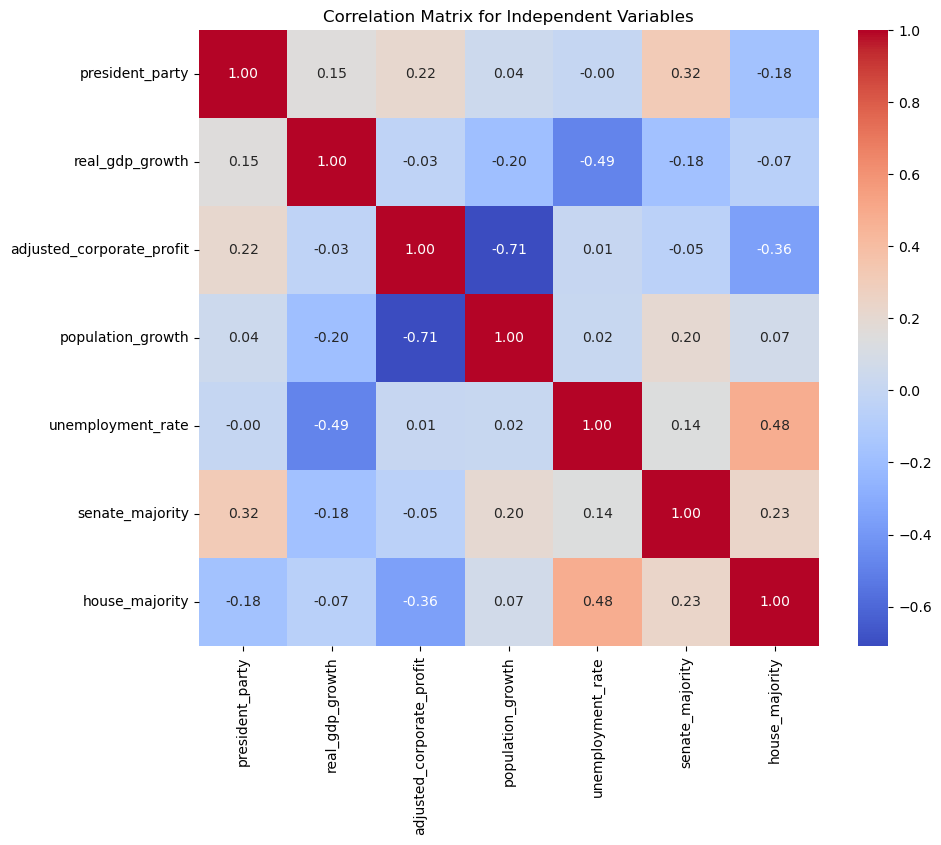

In [29]:
#correlation matrix to test multicollinearity
selected_columns = df_president_ok[['president_party', 'real_gdp_growth' , 'adjusted_corporate_profit' , 'population_growth', 'unemployment_rate', 'senate_majority', 'house_majority']]
corr_matrix = selected_columns.corr()
# Visualize the correlation matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Independent Variables')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Results
Before conducting the regression analysis, I visualized the new business formation rate over time, annotating the years under Democratic presidencies with shading. From 1978 to 2021, there is a general decline in the rate of new business formation. Visually, there appears to be no direct correlation between the president's political affiliation and new business formation rates. However, a noteworthy observation is the spike in new business formation that occurs immediately after a transition from one political party to another in the presidency. I hypothesize that this pattern emerges because new presidents typically introduce a range of new policies upon taking office, some of which may be perceived as favorable by entrepreneurs. Subsequently, the intensity of policy announcements tends to decrease, and some previously enacted policies may prove less effective than anticipated.

In the first model, the result shows that the president being a Democrat is associated with a 0.85 units decrease in the establishment entry rate, which is statistically significant at 0.1 level.

In the second model, the result shows that controlling for these variables, the president being a Democrat is associated with a 0.43 units decrease in the establishment entry rate, but such coefficient is not statistically significant at 0.1 level.

My findings suggest that Democrat presidents is negatively associated with amount of new business formations. Potential explanations might be that Democrat presidents create a more stringent regulatory environment and place more emphasis on social welfare and redistribution. However, understanding whether these mechanisms hold true require further empirical analysis. Moreover, the fact that controlling for some economic variables makes the coefficient insignificant implies that economic factors may outweigh political influences in their impact on entrepreneurship. With that said, we need additional models addressing multicollinearity and endogeneity problems to validate this claim.

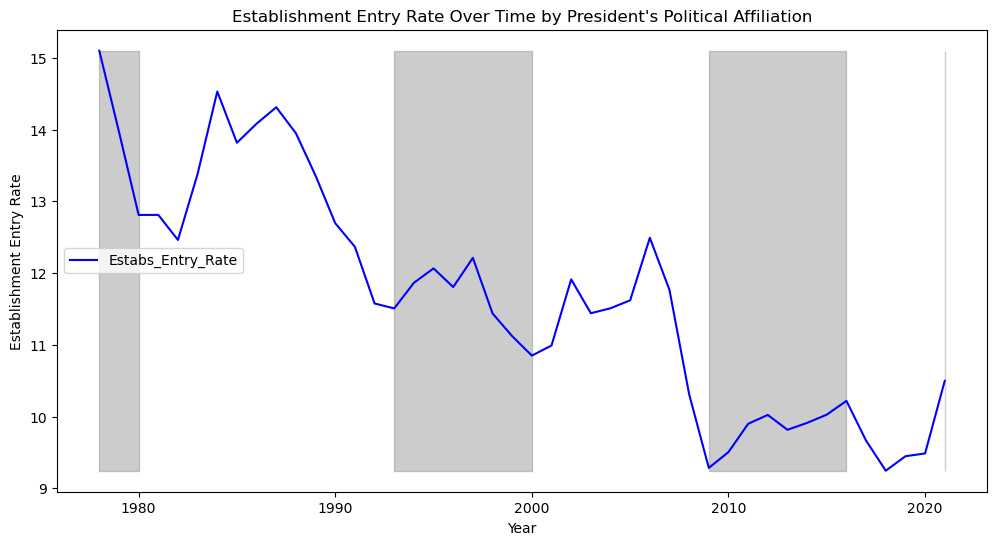

In [5]:
# Sort data by year if not already sorted
df_president.sort_values('year', inplace=True)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plotting the line for 'estab_entry_rate'
plt.plot(df_president['year'], df_president['estabs_entry_rate'], label='Estabs_Entry_Rate', color='blue')

# Adding shaded areas for Democratic years
# Assuming 'political_party' is 1 for Democrats, 0 for Republicans
democratic_years = df_president['president_party'] == 1
plt.fill_between(df_president['year'], df_president['estabs_entry_rate'].min(), df_president['estabs_entry_rate'].max(),
                 where=democratic_years, color='grey', alpha=0.4)

# Adding labels and title
plt.title('Establishment Entry Rate Over Time by President\'s Political Affiliation')
plt.xlabel('Year')
plt.ylabel('Establishment Entry Rate')
plt.legend()

# Show the plot
plt.show()

In [18]:
model = ols('estabs_entry_rate ~ president_party', data= df_president) # create linear model
fit = model.fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      estabs_entry_rate   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.229
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0795
Time:                        00:22:43   Log-Likelihood:                -81.300
No. Observations:                  44   AIC:                             166.6
Df Residuals:                      42   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.0507      0.321     37.566      0.000      11.403      12.698
president_party    -0.8550      0.476     -1.797      0.080      -1.815       0.105
==============================================================================
Omnibus:                        0.629   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.718
Skew:                           0.250   Prob(JB):                        0.698
Kurtosis:                       2.623   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model2 = ols('estabs_entry_rate ~ president_party + real_gdp_growth + adjusted_corporate_profit + population_growth + unemployment_rate', data= df_president) # create linear model
fit2 = model2.fit() 
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      estabs_entry_rate   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     24.71
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           5.36e-11
Time:                        14:33:43   Log-Likelihood:                -51.091
No. Observations:                  44   AIC:                             114.2
Df Residuals:                      38   BIC:                             124.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    13.8104      1.331     10.376      0.000      11.116      16.505
president_party              -0.4285      0.282     -1.517      0.137      -1.000       0.143
real_gdp_growth              19.4957      5.614      3.473      0.001       8.131      30.860
adjusted_corporate_profit   -40.7818      6.196     -6.582      0.000     -53.325     -28.238
population_growth            -0.7546      0.871     -0.866      0.392      -2.518       1.009
unemployment_rate             0.0979      0.071      1.377      0.177      -0.046       0.242
==============================================================================
Omnibus:                        4.018   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.003
Skew:                           0.618   Prob(JB):                        0.223
Kurtosis:                       3.329   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model5 = ols('estabs_entry_rate ~ president_party', data= df_president) # create linear model
fit5 = model5.fit() 
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      estabs_entry_rate   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.229
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0795
Time:                        00:23:15   Log-Likelihood:                -81.300
No. Observations:                  44   AIC:                             166.6
Df Residuals:                      42   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.0507      0.321     37.566      0.000      11.403      12.698
president_party    -0.8550      0.476     -1.797      0.080      -1.815       0.105
==============================================================================
Omnibus:                        0.629   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.718
Skew:                           0.250   Prob(JB):                        0.698
Kurtosis:                       2.623   Cond. No.                         2.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""